In [1]:
import pandas as pd

df = pd.read_csv('exames.csv')
df.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [2]:
df.shape
#Dataset contendo 569 observações e 34 variáveis.

(569, 35)

In [3]:
#Verificando valores Null
df.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [4]:
#Primeira versão do conjunto de dados

df_v1 = df.drop(columns = ['exame_33'])
df_v1.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


# Treinando o primeiro modelo

In [60]:
#Separando base de treino e teste

from sklearn.model_selection import train_test_split
from numpy import random

SEED = 1337
random.seed(SEED)

exames = df_v1.drop(columns=['id', 'diagnostico'])
diagnostico = df_v1.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(exames, diagnostico, test_size = 0.3)

In [83]:
#Treinando o primeiro modelo usando o RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

modelo1 = RandomForestClassifier(n_estimators = 100)
modelo1.fit(treino_x, treino_y)

print("Resultado da classificação %.2f%%" %(modelo1.score(teste_x,teste_y)*100))

Resultado da classificação 93.57%


Resultado da classificação do modelo 1: 93.57%


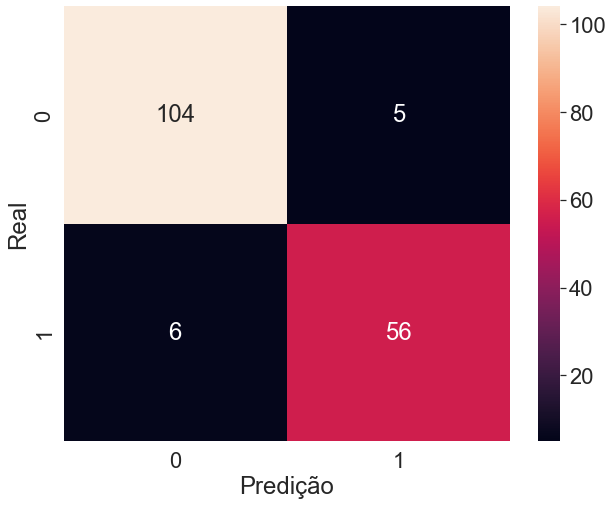

In [84]:
#Construção da matriz de confusão

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Função para plotar a matriz de confusão

def cf_mt(valores_teste_y, modelo_treinado, valores_teste_x):
    
    matriz_confusao = confusion_matrix(valores_teste_y,modelo_treinado.predict(valores_teste_x))

    plt.figure(figsize = (10, 8))
    sns.set(font_scale= 2)
    sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")
    
print("Resultado da classificação do modelo 1: %.2f%%" %(modelo1.score(teste_x,teste_y)*100))
cf_mt(teste_y, modelo1, teste_x)

# Treinando modelo dummy

Resultado da classificação do dommy: 63.74%


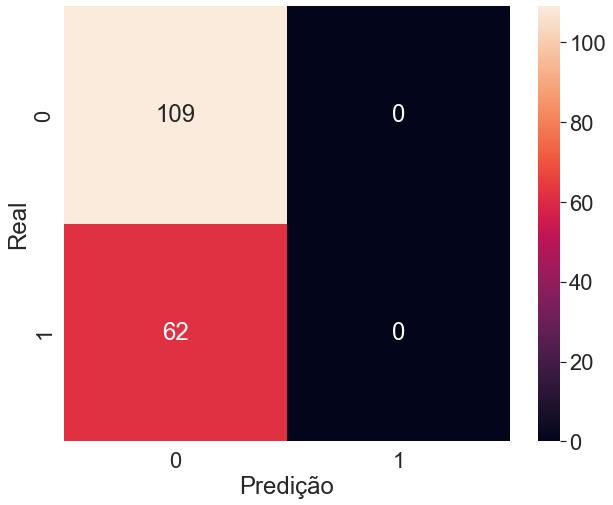

In [81]:
#Treinando o modelo Dummy para comparativo

from sklearn.dummy import DummyClassifier

SEED = 1337
random.seed(SEED)

modelo_dummy = DummyClassifier(strategy= "most_frequent")
modelo_dummy.fit(treino_x, treino_y)
print("Resultado da classificação do dommy: %.2f%%" %(modelo_dummy.score(teste_x, teste_y)*100))

cf_mt(teste_y, modelo_dummy, teste_x)

# Plotando a proporção entre câncer B e câncer M para cada tipo de exame

In [44]:
# Retirada dos valores não numéricos para padronização dos valores de exame

df_exames_v1 = df_v1.drop(columns = ['id', 'diagnostico'])

In [9]:
df_exames_v1.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [21]:
# Padronização das variáveis

from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(df_exames_v1)
df_exames_v2 = padronizador.transform()
df_exames_v2 = pd.DataFrame(data = df_exames_v2, columns = df_exames_v1.keys())
df_exames_v2.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,1.0,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.0,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.0,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.0,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.0,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.0,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.0,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.0,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.0,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.0,0.729259,-0.868353,-0.397100


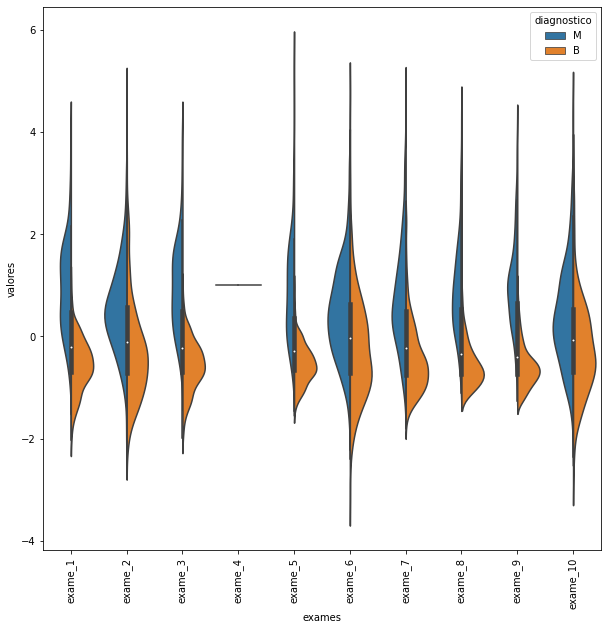

In [14]:
# Criando a função que irá plotar o gráfico

def grafico_violino(valores, inicio, fim):

    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]],axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                         var_name="exames",
                         value_name='valores')
    plt.figure(figsize=(10, 10))
    sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
                   data = dados_plot, split= True)
    plt.xticks(rotation = 90)
    
grafico_violino(df_exames_v2, 0, 10)

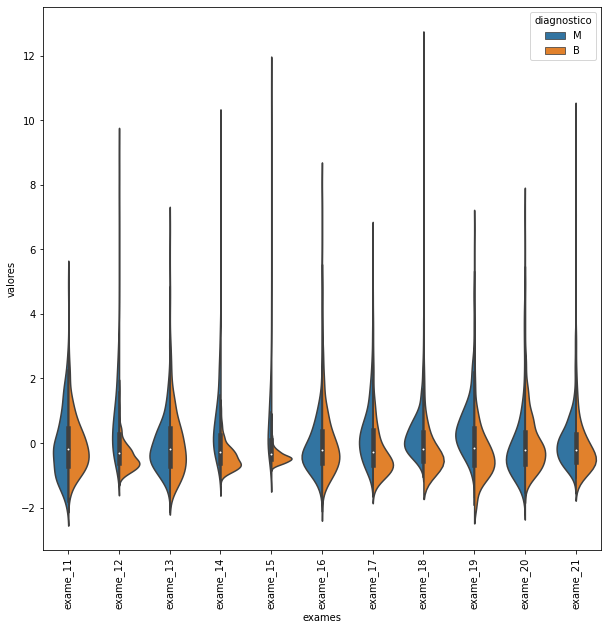

In [15]:
grafico_violino(df_exames_v2, 10, 21)

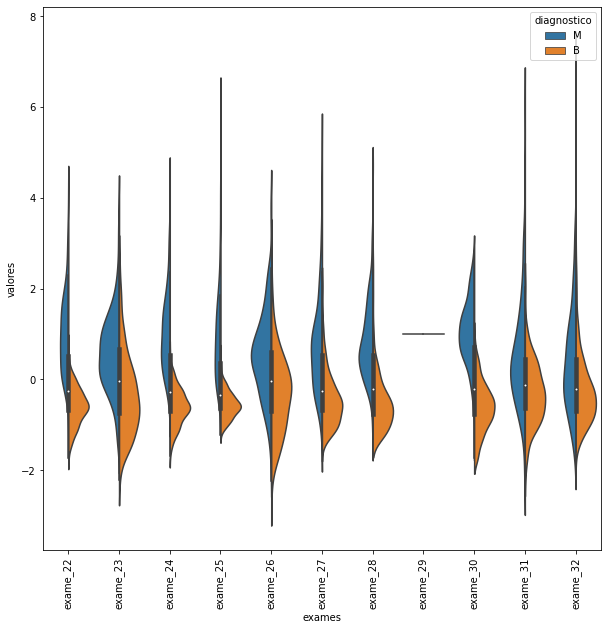

In [18]:
grafico_violino(df_exames_v2, 21, 33)

# Retirando exames que tem valores contínuos

In [24]:
# Como resultado, as variáveis exame_4 e exame_29 tem valores idênticos para todas as linhas. 
# Portanto, serão retiradas do dataset 

df_exames_v3 = df_exames_v2.drop(columns = ['exame_4', 'exame_29'])
df_exames_v3.head()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Resultado da classificação do modelo 2: 94.74%


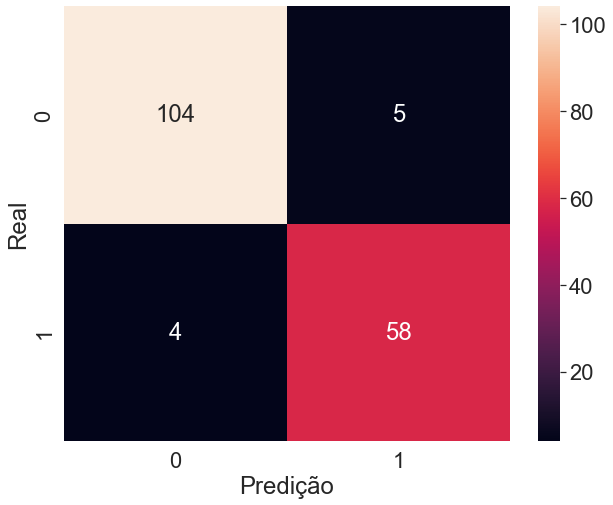

In [85]:
SEED = 1337
random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(df_exames_v3, diagnostico, test_size = 0.3)
    
modelo2 = RandomForestClassifier(n_estimators = 100)
modelo2.fit(treino_x, treino_y)

print("Resultado da classificação do modelo 2: %.2f%%" %(modelo2.score(teste_x,teste_y)*100))

cf_mt(teste_y, modelo3, teste_x)

In [46]:
# Resultado do modelo acima superior ao encontrado na primeira classificação 93.57% x 94,74%

# Avaliando correlação das variáveis

<AxesSubplot:>

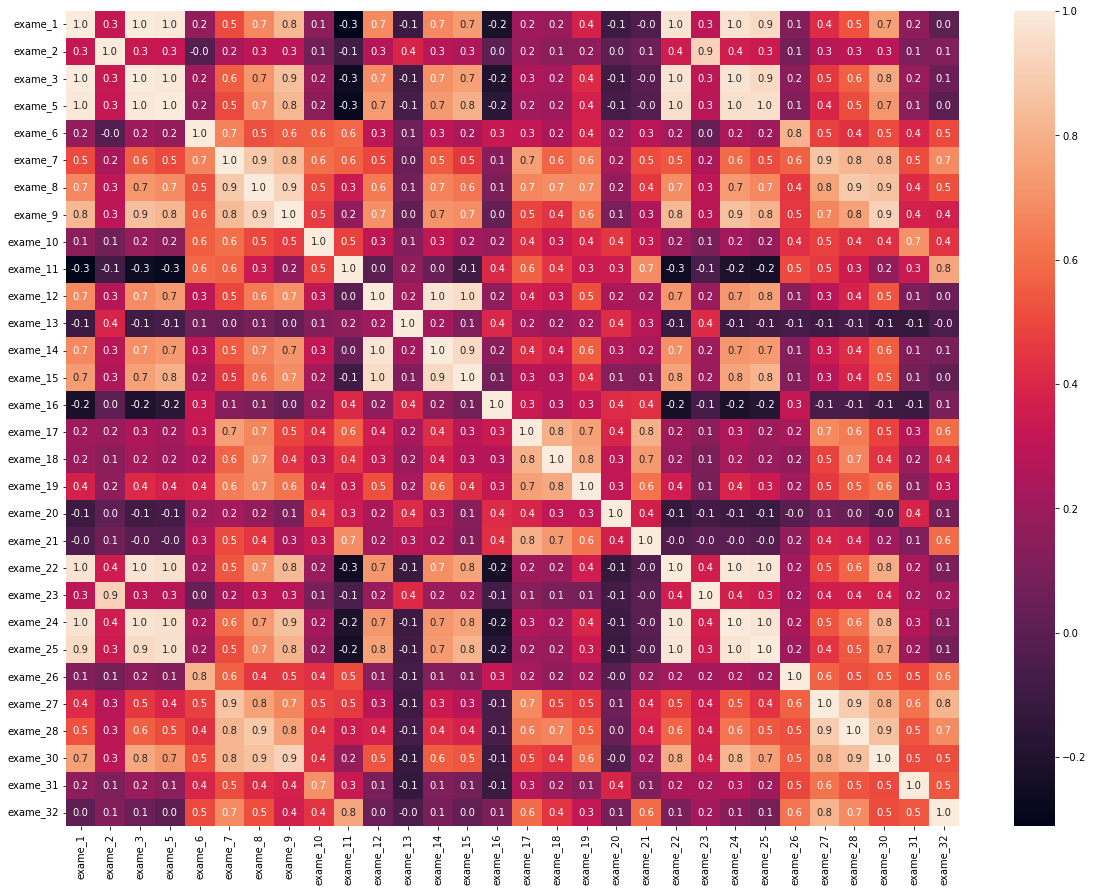

In [34]:
# Construir a matriz de correlação para verificar novas oportunidades de melhoria

hm_matriz_correl = df_exames_v3.corr()
plt.figure(figsize = (20, 15))
sns.heatmap(hm_matriz_correl, annot = True, fmt = ".1f")

In [35]:
# Buscando variávels altamente correlacionáveis

matriz_correl = hm_matriz_correl[hm_matriz_correl>0.99]
matriz_correl

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Todos os valores superiores a 1, mostram que as variáveis são correlacionáveis entre sí.

matriz_correl_2 = matriz_correl.sum()
matriz_correl_2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [38]:
exames_correlacionados = matriz_correl_2[matriz_correl_2>1]
exames_correlacionados

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [42]:
# Retirando uma das duplas variáveis que são correlacionáveis entre sí.
# Escolha pelo exame_1 e exame_22

df_exames_v4 = df_exames_v3.drop(columns = ['exame_1', 'exame_22'])

Resultado da classificação 93.57%


Resultado da classificação do modelo 3: 93.57%


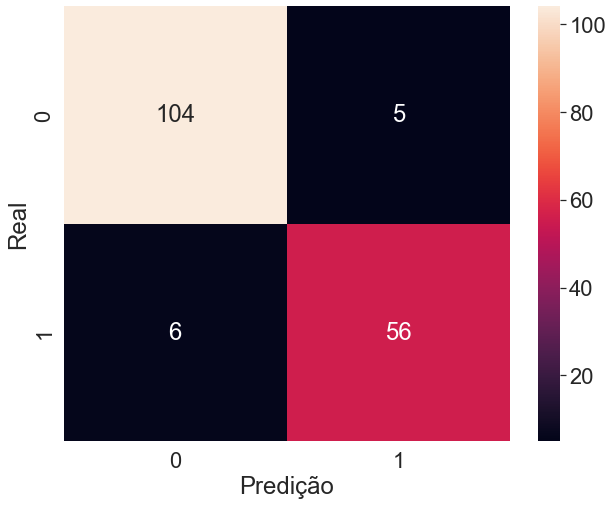

In [87]:
SEED = 1337
random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(df_exames_v4, diagnostico, test_size = 0.3)
    
modelo3 = RandomForestClassifier(n_estimators = 100)
modelo3.fit(treino_x, treino_y)

print("Resultado da classificação do modelo 3: %.2f%%" %(modelo3.score(teste_x,teste_y)*100))

cf_mt(teste_y, modelo3, teste_x)

# Utilizando métodos para selecionar as melhores variáveis do modelo

# KBest

In [47]:
# Utilização do KBest e a equação do chi2

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k = 5)

In [48]:
# O kbest não aceita valores negativos, por isso criar uma novo df sem a padronização

df_exames_v5 = df_exames_v1.drop(columns = ['exame_4','exame_29','exame_1', 'exame_22'])
df_exames_v5

,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,0.006193,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,0.003532,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,0.004571,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,0.009208,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,0.005115,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,0.004239,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,0.002498,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,0.003892,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,0.006185,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [50]:
# Utilizando o kbest e separando dados de treino e teste

SEED= 1337
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(df_exames_v5, diagnostico, test_size = 0.3)

selecionar_kmelhores.fit(treino_x,treino_y)

treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [51]:
teste_kbest.shape

(171, 5)

In [52]:
# Redução de 569 linhas e 28 colunas para 171 linhas e 5 colunas.

Resultado da classificação 92.40%


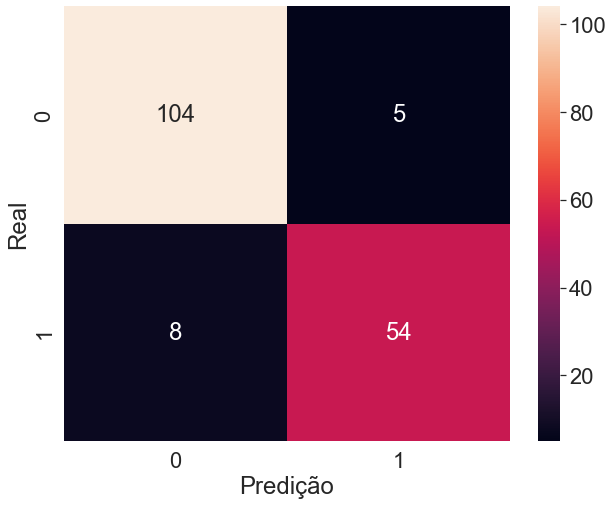

In [88]:
# Classificando o novo df

classificador_kbest = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador_kbest.fit(treino_kbest, treino_y)

print("Resultado da classificação %.2f%%" %(classificador_kbest.score(teste_kbest,teste_y)*100))
cf_mt(teste_y, classificador_kbest, teste_kbest)

# RFE

Resultado da classificação: 92.98%


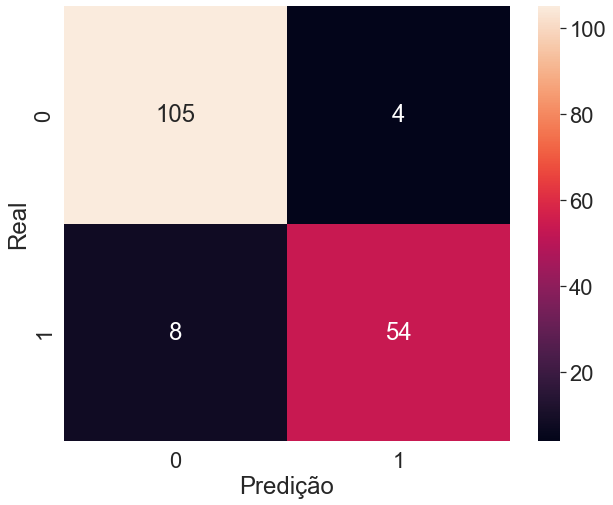

In [101]:
from sklearn.feature_selection import RFE

SEED= 1337
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(df_exames_v5, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1337)
classificador.fit(treino_x, treino_y)

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)

treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador_rfe.fit(treino_rfe, treino_y)


print("Resultado da classificação: %.2f%%" %(classificador_rfe.score(teste_rfe,teste_y)*100))
cf_mt(teste_y, classificador_rfe, teste_rfe)

# RFECV

Resultado da classificação: 95.91%


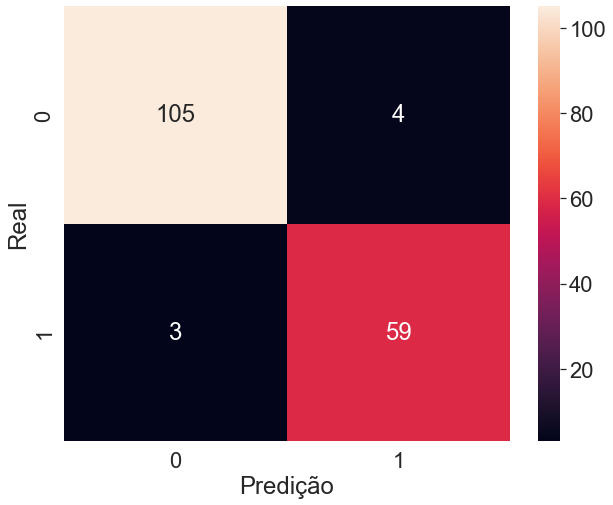

In [102]:
from sklearn.feature_selection import RFECV

SEED= 1337
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(df_exames_v5, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1337)
classificador.fit(treino_x, treino_y)

selecionador_rfecv = RFECV(estimator = classificador, cv = 5, step = 1, scoring="accuracy")
selecionador_rfecv.fit(treino_x, treino_y)

treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)

classificador_rfecv.fit(treino_rfecv, treino_y)

print("Resultado da classificação: %.2f%%" %(classificador_rfecv.score(teste_rfecv,teste_y)*100))
cf_mt(teste_y, classificador_rfecv, teste_rfecv)

In [97]:
# Verificar a acurácia do modelo utilizando RFECV, a medida que o número de variáveis utilizadas aumenta

len(selecionador_rfecv.grid_scores_)

28

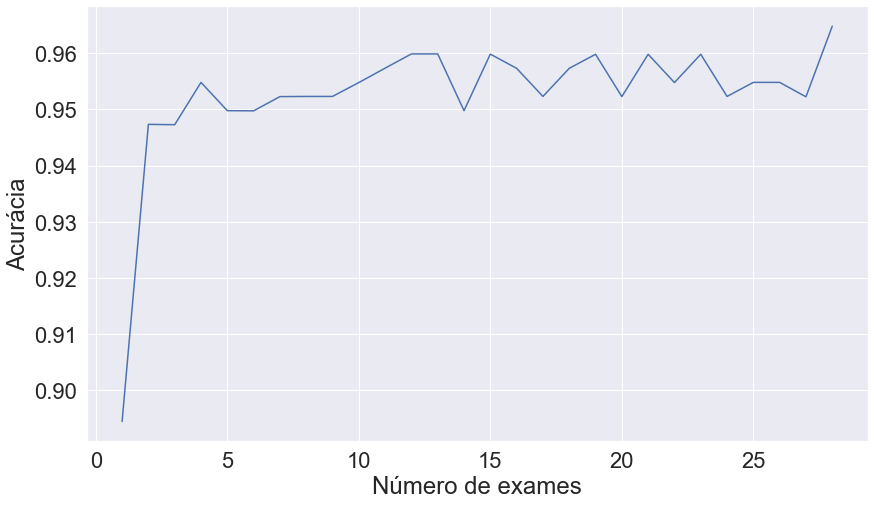

In [98]:
# Plotando a visualização

plt.figure(figsize = (14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")
plt.plot(range(1, len(selecionador_rfecv.grid_scores_) +1), selecionador_rfecv.grid_scores_)
plt.show()

In [100]:
# Variáveis selecionadas pelo RFECV como as melhores 
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_2', 'exame_3', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_11', 'exame_12', 'exame_13', 'exame_14',
       'exame_15', 'exame_16', 'exame_17', 'exame_18', 'exame_19', 'exame_20',
       'exame_21', 'exame_23', 'exame_24', 'exame_25', 'exame_26', 'exame_27',
       'exame_28', 'exame_30', 'exame_31', 'exame_32'],
      dtype='object')

# Resultado final

O melhor modelo encontrado foi o Utilizando o RFECV para encontra as melhores variáveis do modelo.

A acurácia foi de 95.91% com uma redução de 33 exames no dataset original para 28 exames usados para a classificação.